<h1 align="center">Cloud Resource Optimizer</h1>
<h3>Name: Shruti Anil Chinke</h3>
<h3>Roll No: 63</h3>





In [47]:
import numpy as np
import pandas as pd


from numpy.linalg import inv
import os
from numpy import random
import scipy
from scipy import stats
from scipy.stats import skew, kurtosis
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import t
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import chisquare
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import f

import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

from statsmodels.stats import proportion as ssp
from statsmodels.stats.proportion import  proportions_ztest

from statsmodels.stats import rates
from statsmodels.stats.rates import test_poisson
from statsmodels.stats.rates import test_poisson_2indep


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from statsmodels.miscmodels.ordinal_model import OrderedModel

from statsmodels.discrete.discrete_model import Poisson as psn
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import NegativeBinomial as ngb

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report


from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA



In [48]:
df=pd.read_csv("cloud_optimizer.csv")
df.head()

,vm_id,timestamp,cpu_usage,memory_usage,disk_io,network_traffic,power_consumption,num_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status
0,vm_02315,2025-06-29 00:59:11,65.891148,44.970416,79.147536,81.593031,224.998620,8835,234.450881,0.167,io,medium,running
1,vm_00023,2025-06-29 00:15:47,55.985852,74.130633,49.122988,445.004751,229.548031,1007,246.101195,0.018,network,medium,running
2,vm_01349,2025-06-29 00:45:56,34.106867,79.773003,97.197016,344.983795,214.588040,1731,271.497975,0.030,compute,medium,running
3,vm_02412,2025-06-29 00:35:09,34.138826,61.733021,2.815393,222.970408,216.305035,8215,280.613650,0.135,compute,medium,running
4,vm_03907,2025-06-29 01:03:48,53.851100,31.755124,NaN,132.854074,209.353003,5472,249.427367,0.105,io,low,running


In [49]:
num_completed = int(0.20 * len(df))

# Randomly sample from current running and waiting
eligible_idx = df[df['task_status'].isin(['running', 'waiting'])].sample(n=num_completed, random_state=42).index

# Assign those rows to 'completed'
df.loc[eligible_idx, 'task_status']='completed'

<h3>understand the structure and types of variables </h3>

In [50]:
df.shape

(305000, 13)

In [51]:
unique_values={}
for column in df.columns:
    unique_values[column] = df[column].unique()

unique_values

{'vm_id': array(['vm_02315', 'vm_00023', 'vm_01349', ..., 'vm_01624', 'vm_04172',
        'vm_04838'], dtype=object),
 'timestamp': array(['2025-06-29 00:59:11', '2025-06-29 00:15:47',
        '2025-06-29 00:45:56', ..., '2025-06-29 00:06:38',
        '2025-06-29 00:07:02', '2025-06-29 01:14:56'], dtype=object),
 'cpu_usage': array([65.89114795, 55.98585161, 34.10686724, ..., 64.54015558,
        47.92557281, 71.51697633]),
 'memory_usage': array([44.97041595, 74.13063324, 79.77300302, ..., 66.20879912,
        78.98295403, 55.19520345]),
 'disk_io': array([79.14753649, 49.12298796, 97.19701606, ..., 10.19973507,
        13.58006288, 16.39907031]),
 'network_traffic': array([ 81.59303069, 445.00475087, 344.98379519, ...,  86.56626722,
        172.08059544, 293.07639996]),
 'power_consumption': array([224.9986202 , 229.54803054, 214.58803972, ..., 224.6375088 ,
        218.67024542, 233.38585398]),
 'num_instructions': array([8835, 1007, 1731, ..., 3405, 4649, 7150]),
 'execution_time':

### Cleaning the dataset

In [52]:
df['task_type'] = df['task_type'].str.lower().str.strip()

In [53]:
df['task_type'].unique()

array(['io', 'network', 'compute', nan, 'compuutte'], dtype=object)

In [54]:
df['task_type'] = df['task_type'].replace({
    'compuutte': 'compute',
    'network': 'network',   # to handle 'NetWork'
 'io':'io'
})

In [55]:
df['task_priority'] = df['task_priority'].replace({
    'med': 'medium',
    'High': 'high'  # to handle 'NetWork'
 })

In [56]:
unique_values={}
for column in df.columns:
    unique_values[column] = df[column].unique()

unique_values

{'vm_id': array(['vm_02315', 'vm_00023', 'vm_01349', ..., 'vm_01624', 'vm_04172',
        'vm_04838'], dtype=object),
 'timestamp': array(['2025-06-29 00:59:11', '2025-06-29 00:15:47',
        '2025-06-29 00:45:56', ..., '2025-06-29 00:06:38',
        '2025-06-29 00:07:02', '2025-06-29 01:14:56'], dtype=object),
 'cpu_usage': array([65.89114795, 55.98585161, 34.10686724, ..., 64.54015558,
        47.92557281, 71.51697633]),
 'memory_usage': array([44.97041595, 74.13063324, 79.77300302, ..., 66.20879912,
        78.98295403, 55.19520345]),
 'disk_io': array([79.14753649, 49.12298796, 97.19701606, ..., 10.19973507,
        13.58006288, 16.39907031]),
 'network_traffic': array([ 81.59303069, 445.00475087, 344.98379519, ...,  86.56626722,
        172.08059544, 293.07639996]),
 'power_consumption': array([224.9986202 , 229.54803054, 214.58803972, ..., 224.6375088 ,
        218.67024542, 233.38585398]),
 'num_instructions': array([8835, 1007, 1731, ..., 3405, 4649, 7150]),
 'execution_time':

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305000 entries, 0 to 304999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   vm_id              305000 non-null  object 
 1   timestamp          305000 non-null  object 
 2   cpu_usage          301956 non-null  float64
 3   memory_usage       305000 non-null  float64
 4   disk_io            289732 non-null  float64
 5   network_traffic    305000 non-null  float64
 6   power_consumption  305000 non-null  float64
 7   num_instructions   305000 non-null  int64  
 8   execution_time     305000 non-null  float64
 9   energy_efficiency  305000 non-null  float64
 10  task_type          298901 non-null  object 
 11  task_priority      301950 non-null  object 
 12  task_status        305000 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 30.3+ MB


In [58]:
df.describe()

,cpu_usage,memory_usage,disk_io,network_traffic,power_consumption,num_instructions,execution_time,energy_efficiency
count,301956.000000,305000.000000,289732.000000,305000.000000,305000.000000,305000.000000,305000.000000,305000.000000
mean,50.000238,59.407750,51.213573,201.472623,219.670808,5504.285472,253.285540,0.101493
std,19.775195,23.657273,27.915311,96.712589,22.152806,2597.623394,61.598627,0.048798
min,0.000000,0.000000,0.000172,0.003265,125.573340,1000.000000,164.797546,0.015000
25%,36.520941,42.968264,30.117811,132.195466,204.622887,3256.000000,234.996284,0.060000
50%,49.999218,59.934667,50.040677,199.915352,219.778278,5506.000000,250.137478,0.101000
75%,63.478906,76.817871,70.289777,267.263896,234.855152,7754.000000,265.239437,0.142000
max,100.000000,100.000000,185.803517,661.638392,312.068534,9999.000000,1615.083743,0.259000


#Identify data imbalances, anomalies, and outliers

In [59]:
df.isnull().sum()

,0
vm_id,0
timestamp,0
cpu_usage,3044
memory_usage,0
disk_io,15268
network_traffic,0
power_consumption,0
num_instructions,0
execution_time,0
energy_efficiency,0


In [60]:
df.shape

(305000, 13)

In [61]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # Numerical column
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)
    else:  # Categorical column
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

/tmp/ipython-input-61-3039605679.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)
/tmp/ipython-input-61-3039605679.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [62]:
df.isnull().sum()

,0
vm_id,0
timestamp,0
cpu_usage,0
memory_usage,0
disk_io,0
network_traffic,0
power_consumption,0
num_instructions,0
execution_time,0
energy_efficiency,0


In [63]:
df = df.drop(columns=["vm_id", "timestamp"])
df.head()

,cpu_usage,memory_usage,disk_io,network_traffic,power_consumption,num_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status
0,65.891148,44.970416,79.147536,81.593031,224.998620,8835,234.450881,0.167,io,medium,completed
1,55.985852,74.130633,49.122988,445.004751,229.548031,1007,246.101195,0.018,network,medium,running
2,34.106867,79.773003,97.197016,344.983795,214.588040,1731,271.497975,0.030,compute,medium,running
3,34.138826,61.733021,2.815393,222.970408,216.305035,8215,280.613650,0.135,compute,medium,running
4,53.851100,31.755124,50.040677,132.854074,209.353003,5472,249.427367,0.105,io,low,running


####Seperate the categorical and numerical columns

In [64]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

print(cat_cols)
print(num_cols)

['task_type', 'task_priority', 'task_status']
['cpu_usage', 'memory_usage', 'disk_io', 'network_traffic', 'power_consumption', 'num_instructions', 'execution_time', 'energy_efficiency']


<h5>Duplicate values</h5>

In [65]:
df.duplicated().sum()

np.int64(3342)

####There are 4970 duplicate values

###Remove the duplicate values

In [66]:
df = df.drop_duplicates()

In [67]:
df.duplicated().sum()

np.int64(0)

####here we removed the duplicate values

In [68]:
df.shape

(301658, 11)

# Find the outliers

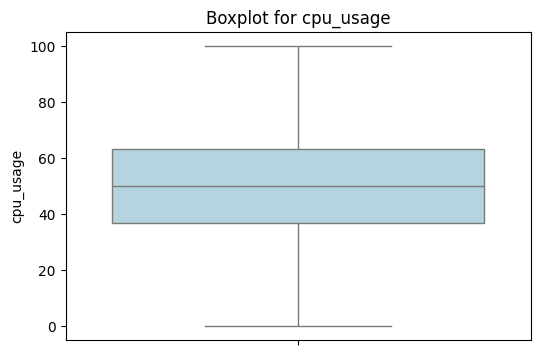

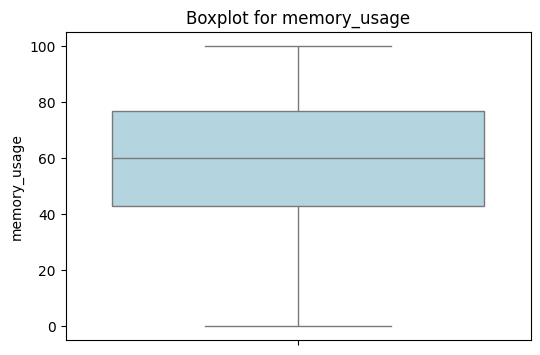

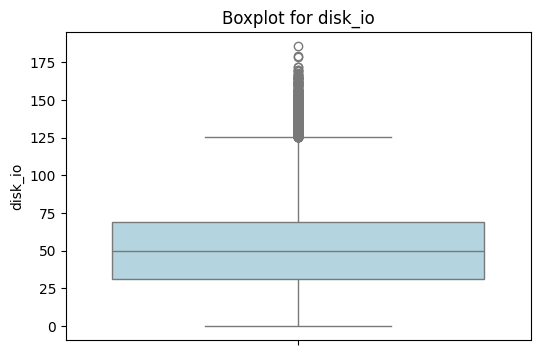

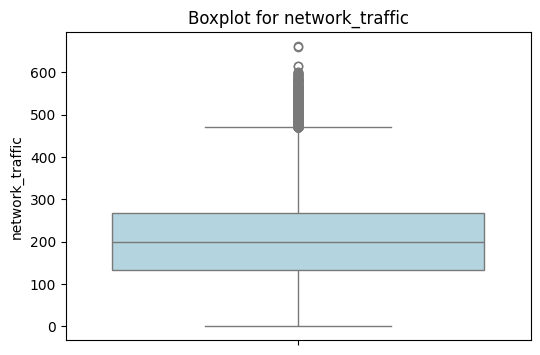

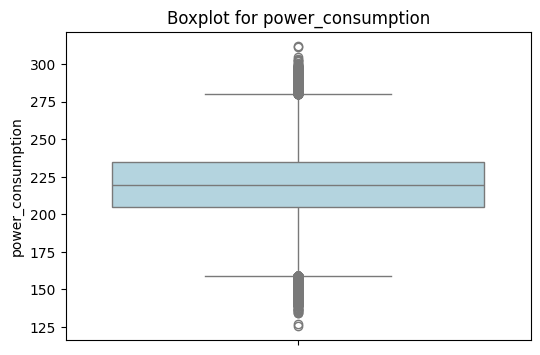

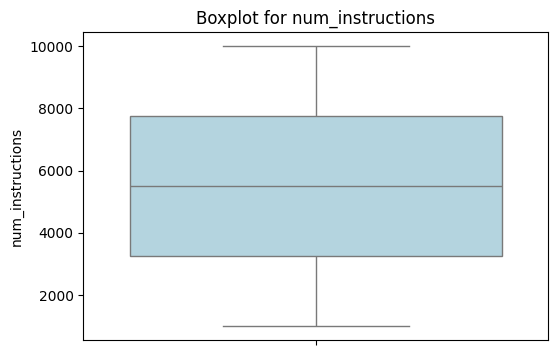

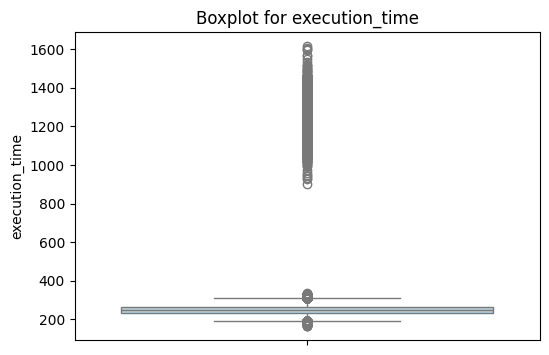

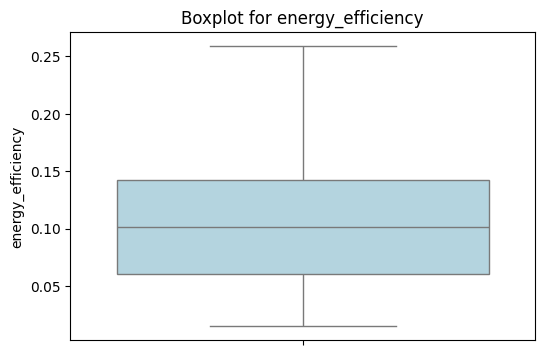

In [69]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # Check if column is numerical
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=df[column], color="lightblue")
        plt.title(f"Boxplot for {column}")
        plt.ylabel(column)
        plt.show()

### There are outliers, so we have to remove them

In [70]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Outliers removed using IQR method.")

Outliers removed using IQR method.


# Univariate Analysis

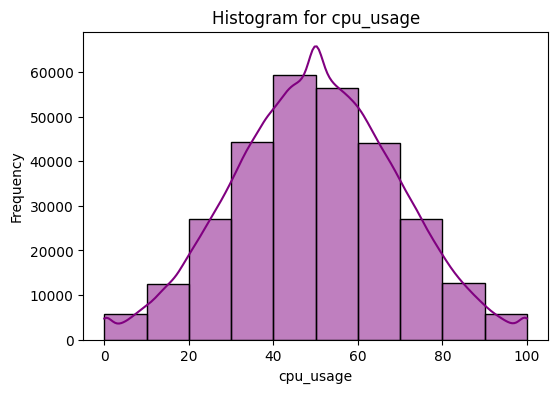

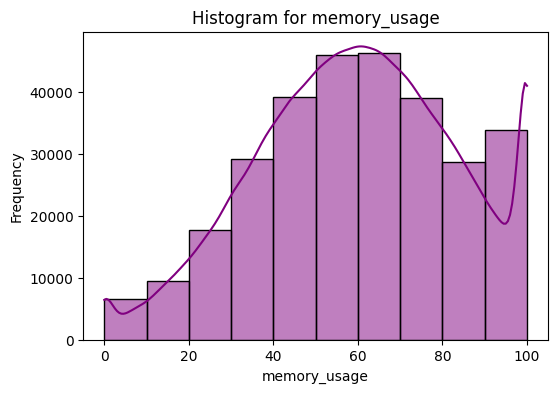

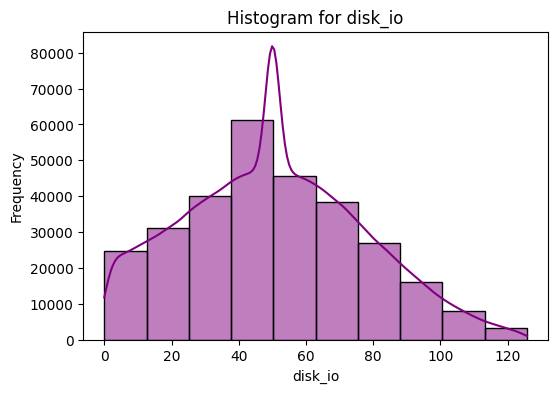

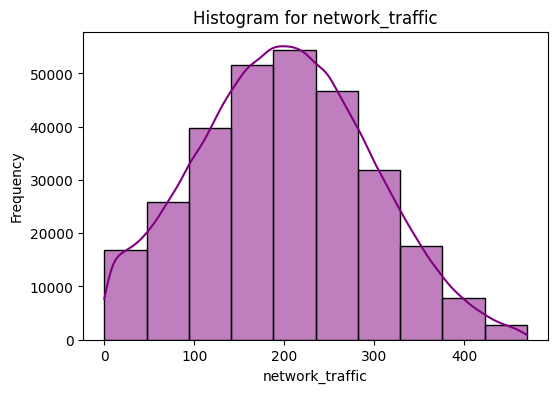

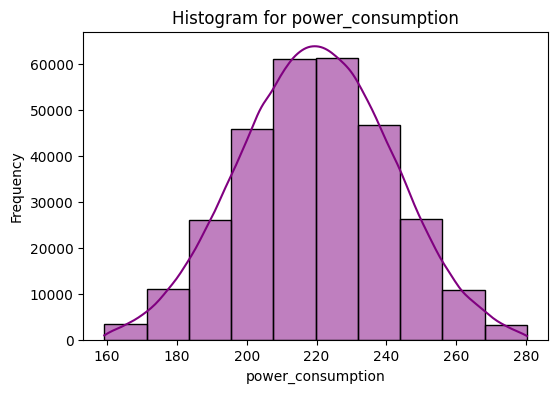

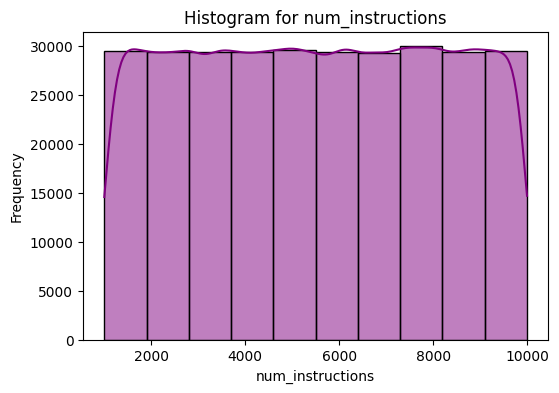

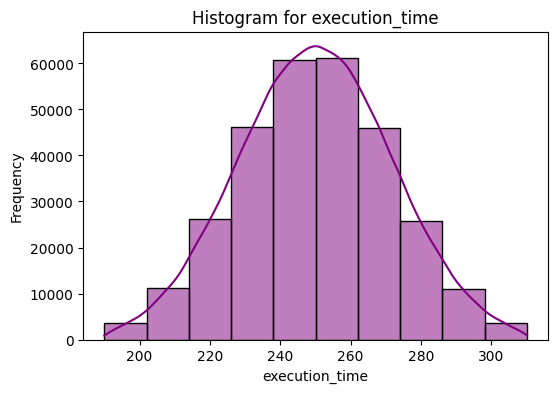

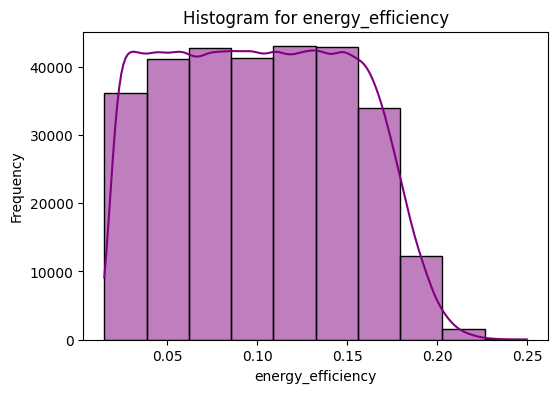

In [71]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[column], kde=True, bins=10, color="purple")
        plt.title(f"Histogram for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

### For categorical data

Frequency distribution for task_type:
task_type
compute    115864
network     92619
io          86554
Name: count, dtype: int64



/tmp/ipython-input-72-2054776268.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=freq.index, palette="viridis")


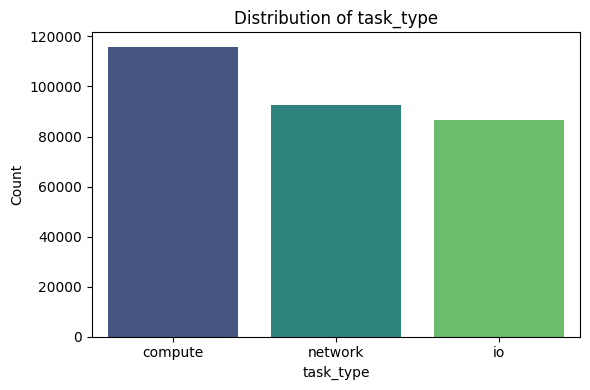

Frequency distribution for task_priority:
task_priority
medium    149157
high       87826
low        58054
Name: count, dtype: int64



/tmp/ipython-input-72-2054776268.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=freq.index, palette="viridis")


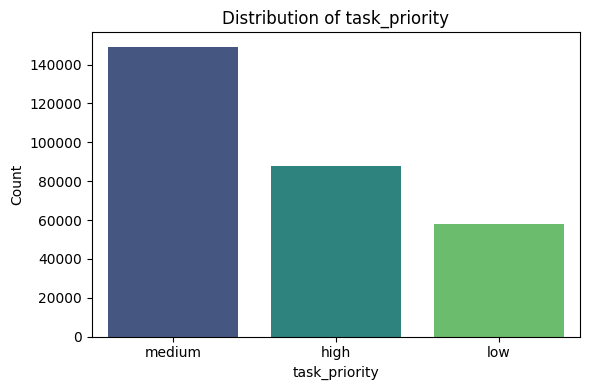

Frequency distribution for task_status:
task_status
running      220859
completed     59488
waiting       14690
Name: count, dtype: int64



/tmp/ipython-input-72-2054776268.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=freq.index, palette="viridis")


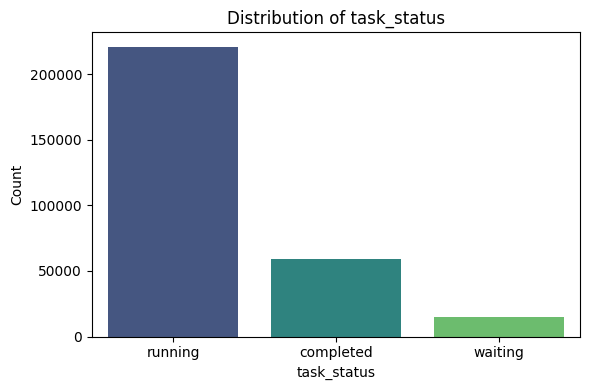

In [72]:
for column in cat_cols:

    freq = df[column].value_counts()
    print(f"Frequency distribution for {column}:\n{freq}\n")


    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=column, order=freq.index, palette="viridis")
    plt.title(f"Distribution of {column}")
    plt.ylabel("Count")
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

### Bivariate Analysis To check relation of each column with the target variable

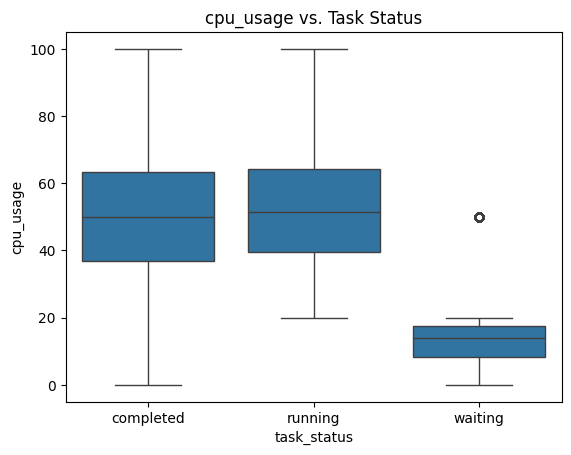

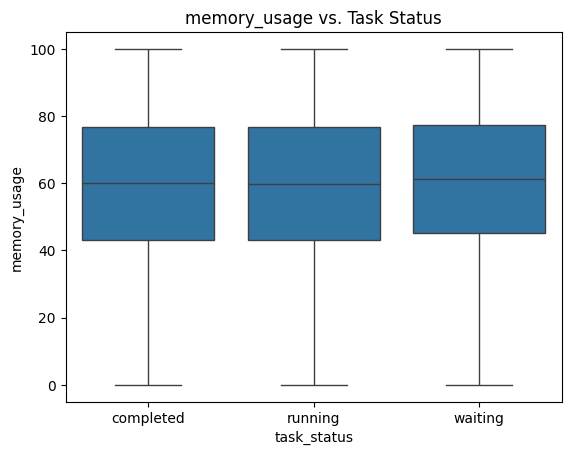

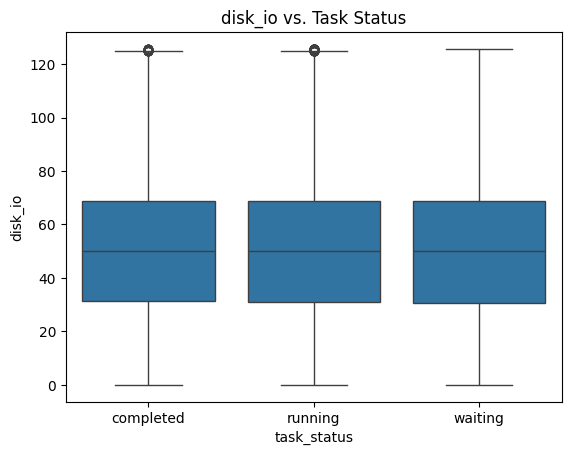

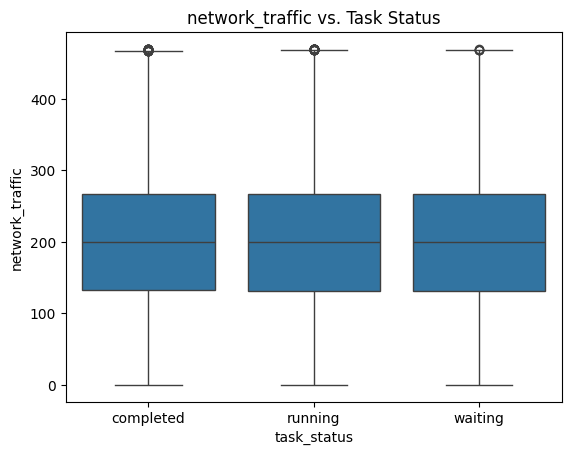

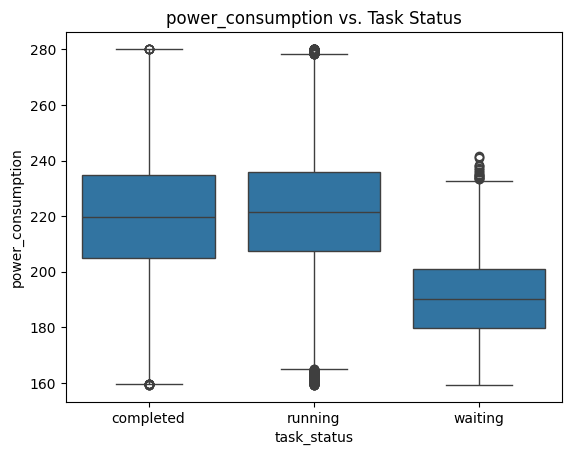

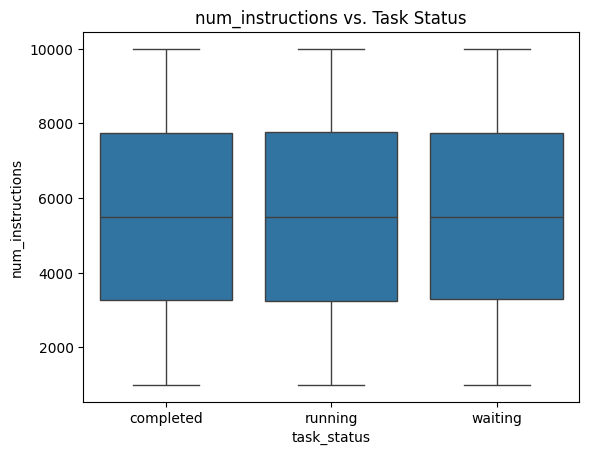

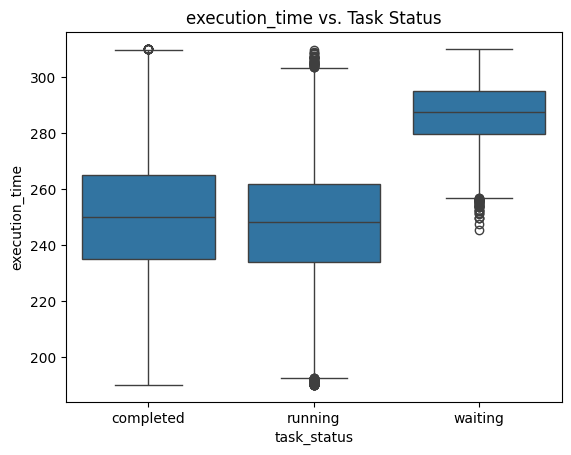

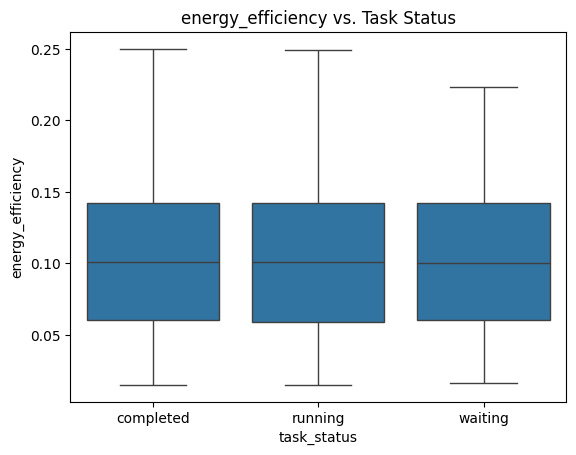

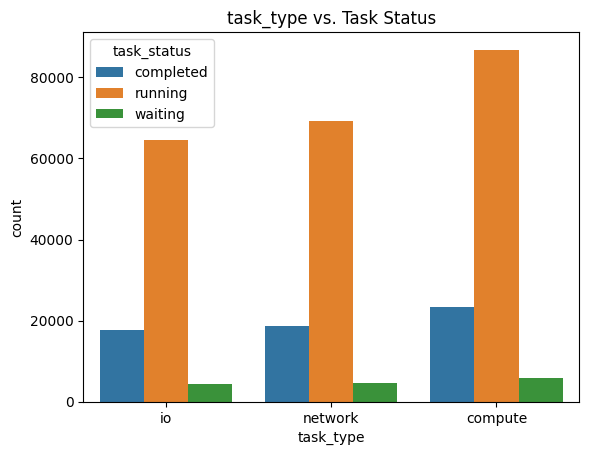

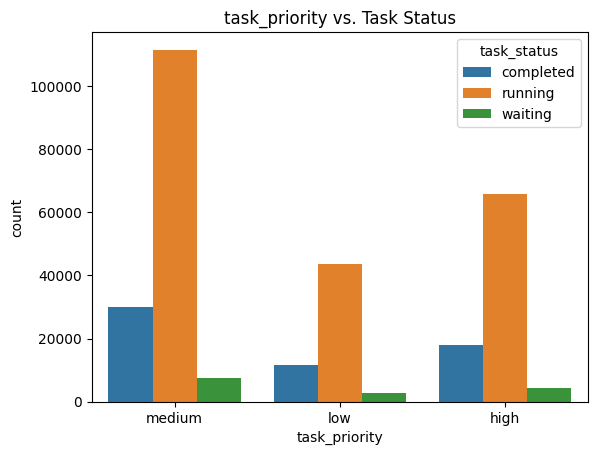

In [73]:
for col in df.columns:
    if col != 'task_status':  # Skip the target column
        if df[col].dtype in ['int64', 'float64']:  # Numerical columns
            sns.boxplot(x='task_status', y=col, data=df)
            plt.title(f"{col} vs. Task Status")
            plt.show()
        else:  # Categorical columns
            sns.countplot(x=col, hue='task_status', data=df)
            plt.title(f"{col} vs. Task Status")
            plt.show()

# Heatmap

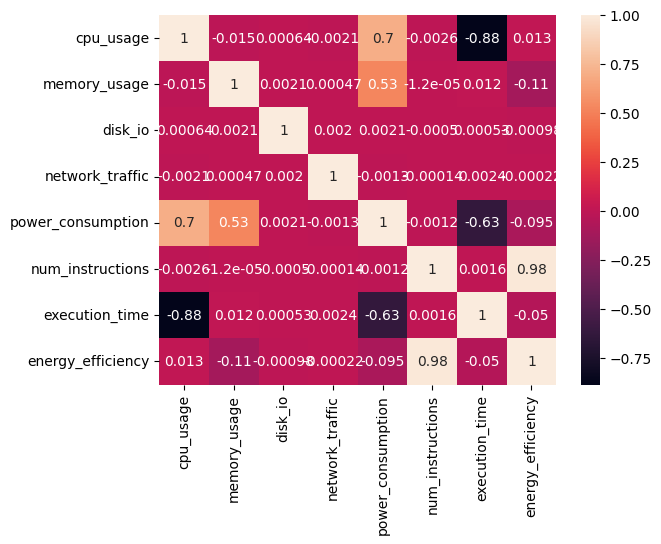

In [74]:
sns.heatmap(df[num_cols].corr(), annot = True)
plt.show()

# Inferential Statistics

### One way anova test

In [75]:
from scipy.stats import f_oneway, chi2_contingency

target_col = 'task_status'

print("\n=== One-Way ANOVA Results ===\n")

for col in num_cols:
    groups = [df[df[target_col] == status][col] for status in df[target_col].unique()]
    f_stat, p_value = f_oneway(*groups)

    print(f'{col} vs {target_col}')
    print(f'F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}')

    if p_value < 0.05:
        print('Significant difference found.\n')
    else:
        print('No significant difference.\n')


=== One-Way ANOVA Results ===

cpu_usage vs task_status
F-statistic: 36764.2984, p-value: 0.0000
Significant difference found.

memory_usage vs task_status
F-statistic: 28.4942, p-value: 0.0000
Significant difference found.

disk_io vs task_status
F-statistic: 1.7960, p-value: 0.1660
No significant difference.

network_traffic vs task_status
F-statistic: 1.1923, p-value: 0.3035
No significant difference.

power_consumption vs task_status
F-statistic: 15852.8929, p-value: 0.0000
Significant difference found.

num_instructions vs task_status
F-statistic: 0.0763, p-value: 0.9265
No significant difference.

execution_time vs task_status
F-statistic: 27643.3947, p-value: 0.0000
Significant difference found.

energy_efficiency vs task_status
F-statistic: 0.0124, p-value: 0.9877
No significant difference.



### Chi square degree of association

In [76]:
print("\n=== Chi-Square Test Results ===\n")

for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df[target_col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f'{col} vs {target_col}')
    print(f'Chi-Square Statistic: {chi2:.4f}, p-value: {p:.4f}')

    if p < 0.05:
        print('Significant association found.\n')
    else:
        print('No significant association.\n')



=== Chi-Square Test Results ===

task_type vs task_status
Chi-Square Statistic: 7.5744, p-value: 0.1085
No significant association.

task_priority vs task_status
Chi-Square Statistic: 5.6204, p-value: 0.2294
No significant association.

task_status vs task_status
Chi-Square Statistic: 590074.0000, p-value: 0.0000
Significant association found.



# Creating dummy columns

In [77]:
task_type_dummy = pd.get_dummies(df.task_type, drop_first=True, prefix='Type').astype(int)
df.drop('task_type',axis=1,inplace=True)

task_priority_dummy = pd.get_dummies(df.task_priority, drop_first=True, prefix='Priority').astype(int)
df.drop('task_priority', axis =1, inplace = True)

In [78]:
df = pd.concat([df,task_type_dummy,task_priority_dummy], axis=1)

In [79]:
df.head()

,cpu_usage,memory_usage,disk_io,network_traffic,power_consumption,num_instructions,execution_time,energy_efficiency,task_status,Type_io,Type_network,Priority_low,Priority_medium
0,65.891148,44.970416,79.147536,81.593031,224.998620,8835,234.450881,0.167,completed,1,0,0,1
1,55.985852,74.130633,49.122988,445.004751,229.548031,1007,246.101195,0.018,running,0,1,0,1
2,34.106867,79.773003,97.197016,344.983795,214.588040,1731,271.497975,0.030,running,0,0,0,1
3,34.138826,61.733021,2.815393,222.970408,216.305035,8215,280.613650,0.135,running,0,0,0,1
4,53.851100,31.755124,50.040677,132.854074,209.353003,5472,249.427367,0.105,running,1,0,1,0


In [80]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Define the order explicitly
encoder = OrdinalEncoder(categories=[['completed', 'running', 'waiting']])
df['task_status'] = encoder.fit_transform(df[['task_status']]).astype(int) + 1  # +1 to make completed=1, as it starts with zero


In [81]:
df.head()

,cpu_usage,memory_usage,disk_io,network_traffic,power_consumption,num_instructions,execution_time,energy_efficiency,task_status,Type_io,Type_network,Priority_low,Priority_medium
0,65.891148,44.970416,79.147536,81.593031,224.998620,8835,234.450881,0.167,1,1,0,0,1
1,55.985852,74.130633,49.122988,445.004751,229.548031,1007,246.101195,0.018,2,0,1,0,1
2,34.106867,79.773003,97.197016,344.983795,214.588040,1731,271.497975,0.030,2,0,0,0,1
3,34.138826,61.733021,2.815393,222.970408,216.305035,8215,280.613650,0.135,2,0,0,0,1
4,53.851100,31.755124,50.040677,132.854074,209.353003,5472,249.427367,0.105,2,1,0,1,0


In [82]:
df['task_status'].unique()

array([1, 2, 3])

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295037 entries, 0 to 304999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cpu_usage          295037 non-null  float64
 1   memory_usage       295037 non-null  float64
 2   disk_io            295037 non-null  float64
 3   network_traffic    295037 non-null  float64
 4   power_consumption  295037 non-null  float64
 5   num_instructions   295037 non-null  int64  
 6   execution_time     295037 non-null  float64
 7   energy_efficiency  295037 non-null  float64
 8   task_status        295037 non-null  int64  
 9   Type_io            295037 non-null  int64  
 10  Type_network       295037 non-null  int64  
 11  Priority_low       295037 non-null  int64  
 12  Priority_medium    295037 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 31.5 MB


# VIF - Variance Inflation Factor

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()

vif_data['Columns'] = df.columns

res = []

for ctr in range(df.shape[1]):
    res.append(variance_inflation_factor(df.values,ctr))

vif_data['VIF'] = res

In [85]:
vif_data

,Columns,VIF
0,cpu_usage,49.420867
1,memory_usage,16.768543
2,disk_io,4.643883
3,network_traffic,5.426777
4,power_consumption,413.082066
5,num_instructions,249.104008
6,execution_time,157.076736
7,energy_efficiency,241.572862
8,task_status,16.622279
9,Type_io,1.746898


# Predictive Statistics

# 1. Ordinal Logistic Regression Model

In [86]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

x_train, x_test, y_train, y_test = train_test_split(df.drop('task_status',axis=1), df.task_status, test_size=0.2, random_state=20)
mod1 = OrderedModel(y_train,x_train,distr='logit').fit(method='bfgs')

print(mod1.summary())

Optimization terminated successfully.
         Current function value: 0.669977
         Iterations: 77
         Function evaluations: 86
         Gradient evaluations: 86
                             OrderedModel Results                             
Dep. Variable:            task_status   Log-Likelihood:            -1.5813e+05
Model:                   OrderedModel   AIC:                         3.163e+05
Method:            Maximum Likelihood   BIC:                         3.164e+05
Date:                Sun, 29 Jun 2025                                         
Time:                        21:32:56                                         
No. Observations:              236029                                         
Df Residuals:                  236015                                         
Df Model:                          12                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

In [87]:
from sklearn.metrics import accuracy_score

# Predict probabilities on training data
predicted_train = mod1.model.predict(mod1.params, exog=x_train)

# Get predicted classes
predicted_train_class = predicted_train.argmax(axis=1) + 1  # Add 1 if classes start from 1

# Actual classes
actual_train_class = y_train.values

# Calculate accuracy
train_accuracy = accuracy_score(actual_train_class, predicted_train_class)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")


Training Accuracy: 0.7490


In [88]:
from sklearn.metrics import accuracy_score

# Predict on test data
predicted = mod1.model.predict(mod1.params, exog=x_test)

# Since predict returns probabilities, get the predicted class
predicted_class = predicted.argmax(axis=1) + 1  # Add 1 because classes start from 1

# Check actual classes
actual_class = y_test.values

# Calculate accuracy
accuracy = accuracy_score(actual_class, predicted_class)

print(f"\nAccuracy on Test Set: {accuracy:.4f}")


Accuracy on Test Set: 0.7469


In [89]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

x_train1, x_test1, y_train1, y_test1 = train_test_split(df.drop(['task_status',  'num_instructions', 'energy_efficiency' ],axis=1), df.task_status, test_size=0.2, random_state=20)
mod1 = OrderedModel(y_train1,x_train1,distr='logit').fit(method='bfgs')

print(mod1.summary())

Optimization terminated successfully.
         Current function value: 0.670766
         Iterations: 48
         Function evaluations: 52
         Gradient evaluations: 52
                             OrderedModel Results                             
Dep. Variable:            task_status   Log-Likelihood:            -1.5832e+05
Model:                   OrderedModel   AIC:                         3.167e+05
Method:            Maximum Likelihood   BIC:                         3.168e+05
Date:                Sun, 29 Jun 2025                                         
Time:                        21:33:49                                         
No. Observations:              236029                                         
Df Residuals:                  236017                                         
Df Model:                          10                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

In [90]:
from sklearn.metrics import accuracy_score

# Predict probabilities on training data
predicted_train = mod1.model.predict(mod1.params, exog=x_train1)

# Get predicted classes
predicted_train_class = predicted_train.argmax(axis=1) + 1  # Add 1 if classes start from 1

# Actual classes
actual_train_class = y_train1.values

# Calculate accuracy
train_accuracy = accuracy_score(actual_train_class, predicted_train_class)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")


Training Accuracy: 0.7490


In [91]:
from sklearn.metrics import accuracy_score

# Predict on test data
predicted = mod1.model.predict(mod1.params, exog=x_test1)

# Since predict returns probabilities, get the predicted class
predicted_class = predicted.argmax(axis=1) + 1  # Add 1 because classes start from 1

# Check actual classes
actual_class = y_test1.values

# Calculate accuracy
accuracy = accuracy_score(actual_class, predicted_class)

print(f"\nAccuracy on Test Set: {accuracy:.4f}")


Accuracy on Test Set: 0.7470


# 2. Lasso

In [92]:
las = Lasso()
par1 = {'alpha':[0.001,0.01,0.1,1, 2, 5, 10]}
grid = GridSearchCV(las, par1, cv=5, scoring='neg_mean_squared_error')
grid.fit(x_train, y_train)
grid.best_params_

{'alpha': 0.01}

In [93]:
las2 = LassoCV(max_iter=10000, tol=1e-5)
las2.fit(x_train, y_train)
las2.alpha_


np.float64(0.004980078087805381)

In [94]:
las2.coef_

array([-4.68990301e-03,  4.00820828e-05, -5.25782722e-05, -1.78123705e-05,
       -2.09311541e-05,  3.40811928e-08,  2.80976466e-04,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [95]:
x_train.columns

Index(['cpu_usage', 'memory_usage', 'disk_io', 'network_traffic',
       'power_consumption', 'num_instructions', 'execution_time',
       'energy_efficiency', 'Type_io', 'Type_network', 'Priority_low',
       'Priority_medium'],
      dtype='object')

Using Lasso used the below Ordinal Logistic Model

In [96]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

x_train2, x_test2, y_train2, y_test2 = train_test_split(df[['cpu_usage', 'memory_usage', 'disk_io', 'network_traffic',
        'power_consumption', 'num_instructions']], df.task_status, test_size=0.2, random_state=20)
mod1 = OrderedModel(y_train2,x_train2,distr='logit').fit(method='bfgs')

print(mod1.summary())

Optimization terminated successfully.
         Current function value: 0.670792
         Iterations: 25
         Function evaluations: 35
         Gradient evaluations: 35
                             OrderedModel Results                             
Dep. Variable:            task_status   Log-Likelihood:            -1.5833e+05
Model:                   OrderedModel   AIC:                         3.167e+05
Method:            Maximum Likelihood   BIC:                         3.168e+05
Date:                Sun, 29 Jun 2025                                         
Time:                        21:34:20                                         
No. Observations:              236029                                         
Df Residuals:                  236021                                         
Df Model:                           6                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

In [97]:
from sklearn.metrics import accuracy_score

# Predict probabilities on training data
predicted_train = mod1.model.predict(mod1.params, exog=x_train2)

# Get predicted classes
predicted_train_class = predicted_train.argmax(axis=1) + 1  # Add 1 if classes start from 1

# Actual classes
actual_train_class = y_train2.values

# Calculate accuracy
train_accuracy = accuracy_score(actual_train_class, predicted_train_class)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")


Training Accuracy: 0.7490


In [98]:
from sklearn.metrics import accuracy_score

# Predict on test data
predicted = mod1.model.predict(mod1.params, exog=x_test2)

# Since predict returns probabilities, get the predicted class
predicted_class = predicted.argmax(axis=1) + 1  # Add 1 because classes start from 1

# Check actual classes
actual_class = y_test2.values

# Calculate accuracy
accuracy = accuracy_score(actual_class, predicted_class)

print(f"\nAccuracy on Test Set: {accuracy:.4f}")


Accuracy on Test Set: 0.7470


# 3. Decision Tree (without parameters)

In [99]:
from sklearn.tree import DecisionTreeClassifier

x = df.drop('task_status', axis=1)
y = df['task_status']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=20)

dtc = DecisionTreeClassifier()

dtc.fit(x_train,y_train)

y_pred1 = dtc.predict(x_train)  #comparing y_pred1 with y_train
y_pred2 = dtc.predict(x_test)   #comparing y_pred2 with y_test

from sklearn.metrics import classification_report

print(classification_report(y_train,y_pred1))
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99     47477
           2       1.00      0.99      1.00    176782
           3       1.00      0.99      1.00     11770

    accuracy                           1.00    236029
   macro avg       0.99      1.00      0.99    236029
weighted avg       1.00      1.00      1.00    236029

              precision    recall  f1-score   support

           1       0.20      0.22      0.21     12011
           2       0.79      0.77      0.78     44077
           3       0.78      0.75      0.76      2920

    accuracy                           0.66     59008
   macro avg       0.59      0.58      0.58     59008
weighted avg       0.67      0.66      0.66     59008



# 4. Decision Tree with hyper-parameter tuning

In [100]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('task_status',axis=1), df['task_status'], test_size=0.2, random_state=20)

dtc = DecisionTreeClassifier(random_state=20)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,5,6,7],
    'min_samples_split': [2,3,4,5, 6],         # split ke baad itni honi chaiye
    'min_samples_leaf': [1, 2,3, 4, 5],           # kam x rows ka node isse jyada nahi  split se pehle kam se kam itni leaf honi chaiye
}

grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search_dtc.fit(x_train, y_train)

best_dtc = grid_search_dtc.best_estimator_


Fitting 5 folds for each of 250 candidates, totalling 1250 fits


In [101]:
print(grid_search_dtc.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [102]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf = 5, min_samples_split =  2)


In [103]:
dtc.fit(x_train,y_train)

y_pred1 = dtc.predict(x_train)
y_pred2 = dtc.predict(x_test)

print(classification_report(y_train,y_pred1))
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           1       0.69      0.00      0.00     47477
           2       0.80      1.00      0.89    176782
           3       0.80      1.00      0.89     11770

    accuracy                           0.80    236029
   macro avg       0.76      0.67      0.59    236029
weighted avg       0.78      0.80      0.71    236029

              precision    recall  f1-score   support

           1       0.21      0.00      0.00     12011
           2       0.80      1.00      0.89     44077
           3       0.79      0.99      0.88      2920

    accuracy                           0.80     59008
   macro avg       0.60      0.66      0.59     59008
weighted avg       0.68      0.80      0.71     59008



Decision Tree with hyperparameter tuning gave us the accuracy of 80%

# 5. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

x= df.drop('task_status', axis=1)  # column of predictors
y= df['task_status']   # column of response
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)
rfc = RandomForestClassifier()

par2 =          {'n_estimators':[10,40,80,100,120],
                               'max_depth':[3,4,5,6,7],
                               'min_samples_leaf': [2,3,4,5],
                               'min_samples_split': [2,3,4,5],
                              }
grid1=GridSearchCV(rfc,param_grid=par2,cv=5,scoring='accuracy')
grid1.fit(x_train,y_train)

In [ ]:
rfc = RandomForestClassifier(max_depth = 6,
 min_samples_leaf= 5,
 min_samples_split= 2,
 n_estimators= 80)

rfc.fit(x_train,y_train)

y_pred1 = rfc.predict(x_train)
y_pred2 = rfc.predict(x_test)

print(rfc.score(x_train, y_train))   # training data accuracy
print(rfc.score(x_test, y_test))    # test data accuracy

Accuraacy of Random Forest Classifier came out to be 80%

In [ ]:
print(classification_report(y_train,y_pred1))
print(classification_report(y_test,y_pred2))

# 6. Gradient Boosting Classifier

In [ ]:
gtc = GradientBoostingClassifier()
params = {
          'learning_rate':[0.05,0.1,0.15,0.2],
          'n_estimators':[50,80,100,120,150]}

gtc_cv = GridSearchCV(estimator=gtc,param_grid=params,cv=5,scoring='accuracy')
gtc_cv.fit(x_train,y_train)

In [ ]:
x= df.drop('task_status', axis=1)  # column of predictors
y= df['task_status']   # column of response
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

gtc = GradientBoostingClassifier(learning_rate= 0.05, loss= 'log_loss', n_estimators= 80)
gtc.fit(x_train,y_train)

print(gtc.score(x_train, y_train))   # training data accuracy
print(gtc.score(x_test, y_test))    # test data accuracy

y_pred1 = gtc.predict(x_train)
y_pred2 = gtc.predict(x_test)

print(classification_report(y_train,y_pred1))
print(classification_report(y_test,y_pred2))

Gradient Boosting Classifier gave us the accuracy of 80%

In [ ]:
df.head()

# Standard Scaling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

x = df.drop('task_status', axis=1)
y = df['task_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

cat_cols = ['Type_io', 'Type_network', 'Priority_low', 'Priority_medium']
nums_x_train = x_train.drop(cat_cols, axis=1)
nums_x_test = x_test.drop(cat_cols, axis=1)

ss = StandardScaler()
nums_x_train_scld = ss.fit_transform(nums_x_train)
nums_x_test_scld = ss.transform(nums_x_test)

x_train_df = pd.DataFrame(nums_x_train_scld, columns=nums_x_train.columns, index=x_train.index)
x_test_df = pd.DataFrame(nums_x_test_scld, columns=nums_x_test.columns, index=x_test.index)

x_train = pd.concat([x_train_df, x_train[cat_cols]], axis=1)
x_test = pd.concat([x_test_df, x_test[cat_cols]], axis=1)

In [ ]:
x_train.head()

In [ ]:
nums_x_train_scld

# K Nearest Neighbours Model

In [ ]:
knn = KNeighborsClassifier()
params = {'n_neighbors':[3,4,5,6,7,8,9,10]}

knn_cv = GridSearchCV(estimator=knn,param_grid=params,cv=3,scoring='accuracy')
knn_cv.fit(x_train,y_train)

In [ ]:
knn_cv.best_params_


In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)

In [ ]:
y_pred1 = knn.predict(x_train)
y_pred2 = knn.predict(x_test)

print(classification_report(y_train,y_pred1))
print(classification_report(y_test,y_pred2))

KNN model gives 73% accuracy

# Out of all models the model which gives us best accuracy is Random Forest Classifier which gives 80% accuracy